# Trabalho 1 da disciplina de Mineração de Dados [CK0223]
### Nome: Matheus Teixeira Guimarães
### Professor: Dr. José Antônio Fernandes de Macedo
### Dataset: Google Play Store Apps 

# Table of contents
0. [Introdução](#0.-Introdu%C3%A7%C3%A3o)
1. [Leitura e análise básica do dataset](#1.-Leitura-e-análise-básica-do-dataset)
2. [Conversão de algumas colunas para *Int*, *Double* e *String*, com o fim de facilitar a análise do dataset](#2.-Convers%C3%A3o-de-algumas-colunas-para-Int,-Double-e-String,-com-o-fim-de-facilitar-a-an%C3%A1lise-do-dataset)
3. [Análise dos dados](#3.-An%C3%A1lise-dos-dados)

# 0. Introdução

No trabalho 1 da disciplina de Mineração de Dados, eu vou analisar o dataset dos apps do Google Play, afim de retirar insights dos seus dados para concluir opiniões como:
- Os melhores tipos de apps para cada categoria de idade
- A melhor precificação para apps, tendo em vista o número de instalações
- E mais...

### Para baixar o dataset no Kaggle:
https://www.kaggle.com/lava18/google-play-store-apps

## 1. Leitura e análise básica do dataset
### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ler dados em formato .csv, disponiveis no link: https://www.kaggle.com/lava18/google-play-store-apps

In [2]:
df = pd.read_csv('googleplaystore.csv')

### Formato das 5 primeiras linhas do dataset

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Formato das 5 últimas linhas do dataset

In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 5 linhas aleatórias do dataset

In [5]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8229,DB Event App,SOCIAL,2.4,37,37M,"5,000+",Free,0,Teen,Social,"June 25, 2017",1.0,4.1 and up
3259,Nokia mobile support,TOOLS,4.4,12215,9.1M,"5,000,000+",Free,0,Everyone,Tools,"August 1, 2018",1.7.4,7.0 and up
6666,Left vs Right: Brain Training,FAMILY,4.5,75719,30M,"5,000,000+",Free,0,Everyone,Educational,"November 24, 2017",3.3.0,4.0.3 and up
9840,CNBC: Breaking Business News & Live Market Data,FINANCE,4.2,24666,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"July 13, 2018",Varies with device,Varies with device
1988,Hungry Shark Evolution,GAME,4.5,6074627,100M,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up


### Todas as colunas existentes no dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Formato dos dados de cada coluna
#### A maioria dos dados está em formato *Object*, então será mais prático transforma-los em *Float*, *String* e etc para a melhor manipulação e análise de cada coluna

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.shape

(10841, 13)

## 2. Conversão de algumas colunas para *Int*, *Double* e *String*, com o fim de facilitar a análise do dataset

### 2.1 Preço

### Preço pode ser convertido para *Double*, retirando o cifrão de dólar, que não é necessário

In [9]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [10]:
df.Price = df.Price.str.replace("$", "").replace("Everyone", "")

In [11]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '',
       '1.20', '1.04'], dtype=object)

In [12]:
df.Price = pd.to_numeric(df.Price)

In [13]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

### 2.2 Installs
#### Installs segue o mesmo padrão de Price, então retiraremos '+' para facilitar a análise da coluna

In [14]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [15]:
df.Installs.head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [16]:
df.Installs = df.Installs.apply(lambda x: x.strip('+'))
df.Installs = df.Installs.apply(lambda x: x.replace(',', '').replace('Free', ''))
df.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
                 1
Name: Installs, dtype: int64

In [17]:
df.Installs = pd.to_numeric(df.Installs)

In [18]:
df.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

### 2.3 Category
#### Category possui os dados corretos, em formato de tag, separados por underline '_'

In [19]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [20]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### 2.4 Content Rating

#### Content Rating também possui os dados bem formatados

In [21]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [22]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### 2.5 Genres

### Genres é separado no seguinte formato: GÊNERO-PRIMÁRIO;GÊNERO-SECUNDÁRIO, então vamos separar os dois em duas colunas diferentes
- Pri_Genres: Categoria
- Sec_Genres: Subcategoria

In [23]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [24]:
df['Pri_Genres'] = df.Genres.apply(lambda x: x.split(';')[0])
df.Pri_Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino',
       'February 11, 2018'], dtype=object)

In [25]:
df['Sec_Genres'] = df.Genres.apply(lambda x: x.split(';')[-1])
df.Sec_Genres.unique()

array(['Art & Design', 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Communication', 'Dating', 'Education', 'Music & Video',
       'Brain Games', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Arcade', 'Casual', 'Card',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Simulation', 'Adventure', 'Board', 'Trivia',
       'Role Playing', 'Medical', 'Social', 'Shopping', 'Photography',
       'Travel & Local', 'Tools', 'Personalization', 'Productivity',
       'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino',
       'February 11, 2018'], dtype=object)

In [26]:
df[['App', 'Pri_Genres', 'Sec_Genres']].head(8)

,App,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,Art & Design
1,Coloring book moana,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,Art & Design
3,Sketch - Draw & Paint,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art & Design,Creativity
5,Paper flowers instructions,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,Art & Design,Art & Design
7,Infinite Painter,Art & Design,Art & Design


### 2.6 Size
#### Size está no formato de 3M (Megabyte), 3KB (Kilobyte) e etc, então iremos transformar para 3^3, 3^6 em diante

In [27]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
df.Size.value_counts().sample(5)

904k    1
27k     1
257k    1
861k    1
375k    3
Name: Size, dtype: int64

In [29]:
df.Size=df.Size.str.replace('k','e+3')
df.Size=df.Size.str.replace('M','e+6')

In [30]:
df.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [31]:
df.Size.unique()

array(['19e+6', '14e+6', '8.7e+6', '25e+6', '2.8e+6', '5.6e+6', '29e+6',
       '33e+6', '3.1e+6', '28e+6', '12e+6', '20e+6', '21e+6', '37e+6',
       '2.7e+6', '5.5e+6', '17e+6', '39e+6', '31e+6', '4.2e+6', '7.0e+6',
       '23e+6', '6.0e+6', '6.1e+6', '4.6e+6', '9.2e+6', '5.2e+6', '11e+6',
       '24e+6', 'Varies with device', '9.4e+6', '15e+6', '10e+6',
       '1.2e+6', '26e+6', '8.0e+6', '7.9e+6', '56e+6', '57e+6', '35e+6',
       '54e+6', '201e+3', '3.6e+6', '5.7e+6', '8.6e+6', '2.4e+6', '27e+6',
       '2.5e+6', '16e+6', '3.4e+6', '8.9e+6', '3.9e+6', '2.9e+6', '38e+6',
       '32e+6', '5.4e+6', '18e+6', '1.1e+6', '2.2e+6', '4.5e+6', '9.8e+6',
       '52e+6', '9.0e+6', '6.7e+6', '30e+6', '2.6e+6', '7.1e+6', '3.7e+6',
       '22e+6', '7.4e+6', '6.4e+6', '3.2e+6', '8.2e+6', '9.9e+6',
       '4.9e+6', '9.5e+6', '5.0e+6', '5.9e+6', '13e+6', '73e+6', '6.8e+6',
       '3.5e+6', '4.0e+6', '2.3e+6', '7.2e+6', '2.1e+6', '42e+6',
       '7.3e+6', '9.1e+6', '55e+6', '23e+3', '6.5e+6', '1.5e+

In [32]:
df.Size = df.Size.replace('Varies with device', np.nan)
df.Size = df.Size.replace('1,000+', 1000)

In [33]:
df.Size = pd.to_numeric(df.Size)

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


### 2.7 Rating
#### Remover app com Rating acima de 5

In [35]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Pri_Genres,Sec_Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,"February 11, 2018","February 11, 2018"


In [36]:
# dff = df.drop(10472, axis=1)
df.drop(10472, inplace=True)
# dff.drop(df.index[10472])

In [37]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Pri_Genres,Sec_Genres


## 3. Análise dos dados
### Após a checagem de cada coluna, faremos a análise do dataset

#### Funções criadas plotagem dos dados

In [38]:
def countplot_90(column):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(column);
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### 3.1 Tipos de genero entre os apps

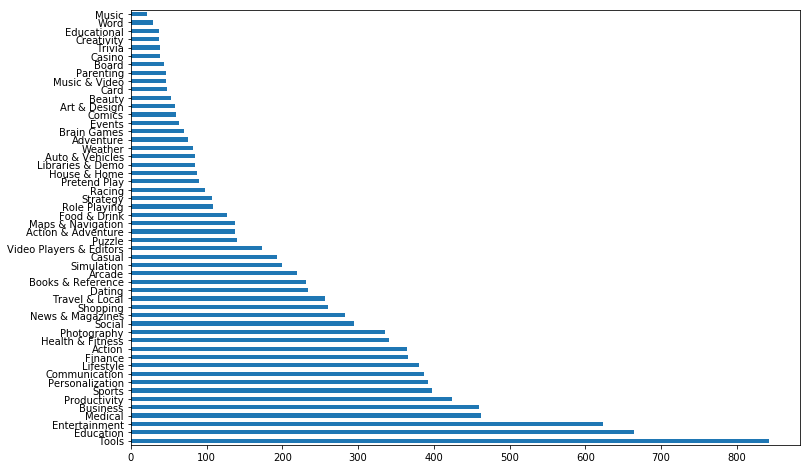

In [39]:
df.Sec_Genres.value_counts().plot(kind='barh',figsize= (12,8))

#### Tipos de categoria dos aplicativos

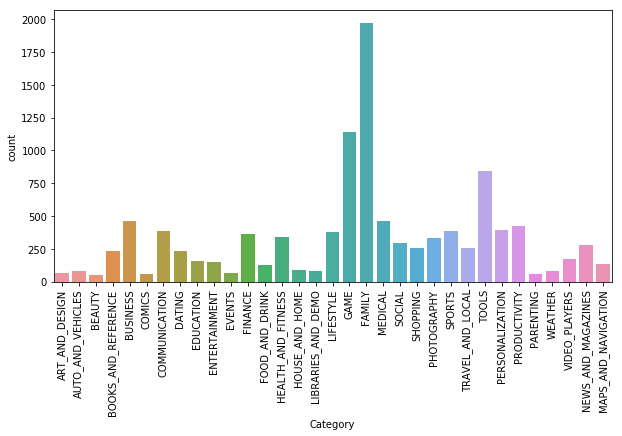

In [40]:
countplot_90(df.Category)

#### Tipos das categoria PRIMÁRIAS dos aplicativos

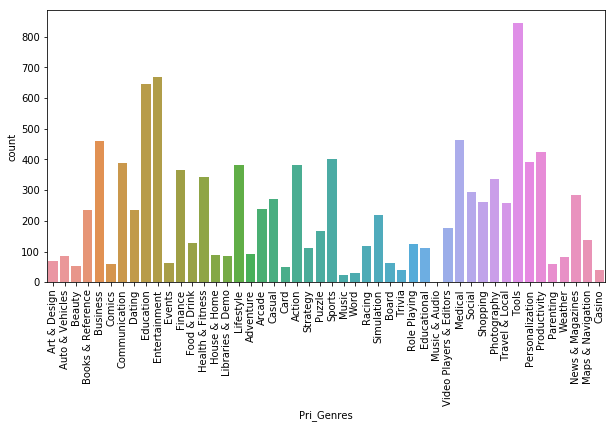

In [41]:
countplot_90(df.Pri_Genres)

#### Tipos das subcategorias PRIMÁRIAS diferentes das categorias primarias

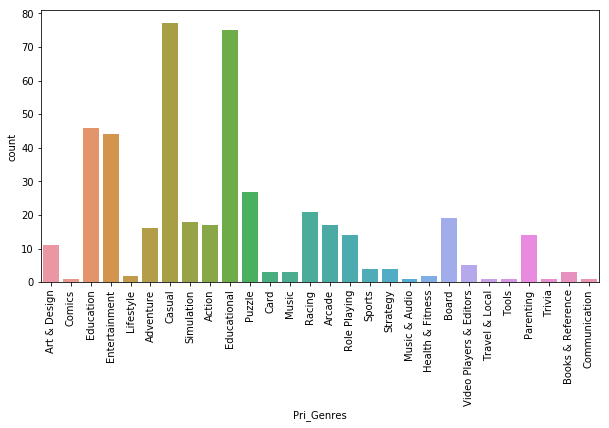

In [42]:
countplot_90(df[df['Sec_Genres'] != df['Pri_Genres']]['Pri_Genres'])

#### Tipos das subcategorias SECUNDÁRIAS diferentes das categorias primarias

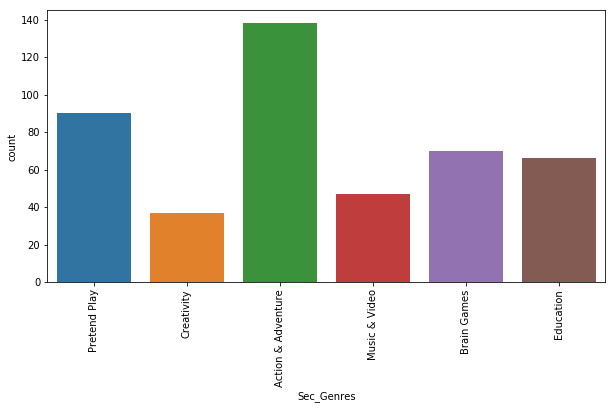

In [43]:
countplot_90(df[df['Sec_Genres'] != df['Pri_Genres']]['Sec_Genres'])

### 3.2 Aplicativos mais baixados por classificação de conteúdo
#### Content rating possui 6 categorias, vamos analisar os maiores apps em cada categoria

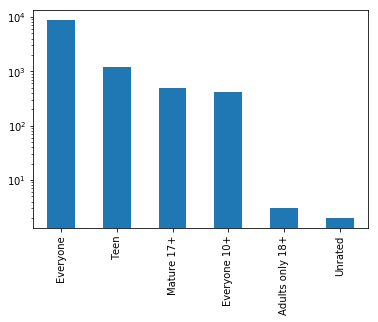

In [44]:
df['Content Rating'].value_counts().plot(kind="bar")
plt.yscale("log")

#### Para classificação de conteúdo para Everyone (*em português:* Todos), o maior número de aplicativos é classificado como *Tools*, *Education* ou *Business*

In [45]:
df_everyone = df[df['Content Rating'] == 'Everyone']

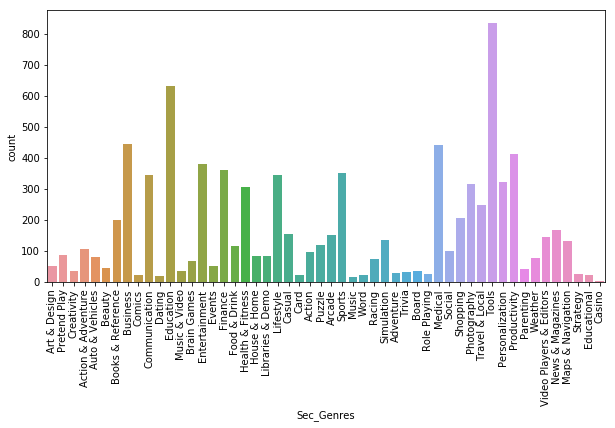

In [46]:
countplot_90(df_everyone.Sec_Genres)

#### Apps mais baixados, de acordo com a classificação *Everyone*

In [47]:
df_everyone.groupby('App')[['Installs']].mean().sort_values(by=['Installs'], ascending=False).head(10)

,Installs
App,
Messenger – Text and Video Chat for Free,1.000000e+09
Google Drive,1.000000e+09
Skype - free IM & video calls,1.000000e+09
Maps - Navigate & Explore,1.000000e+09
WhatsApp Messenger,1.000000e+09
Google,1.000000e+09
Google Chrome: Fast & Secure,1.000000e+09
Gmail,1.000000e+09
Google Photos,1.000000e+09


#### Para classificação de conteúdo para Teen (*em português:* Adolescente), o maior número de aplicativos é classificado como *Entertainment*, *Action* and *Social*

In [48]:
df_teen = df[df['Content Rating'] == 'Teen']

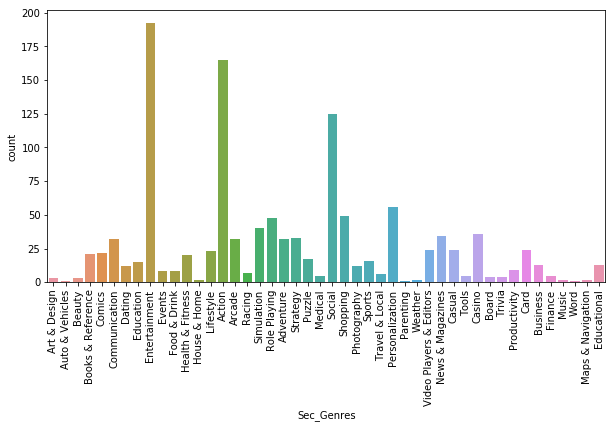

In [49]:
countplot_90(df_teen.Sec_Genres)

#### Apps mais baixados, de acordo com a classificação *Teen*

In [50]:
df_teen.groupby('App')[['Installs']].mean().sort_values(by=['Installs'], ascending=False).head(10)

,Installs
App,
Google Play Games,1.000000e+09
Google+,1.000000e+09
YouTube,1.000000e+09
Facebook,1.000000e+09
Google News,1.000000e+09
Google Play Books,1.000000e+09
Google Play Movies & TV,1.000000e+09
Instagram,1.000000e+09
UC Browser - Fast Download Private & Secure,5.000000e+08


#### Para classificação de conteúdo para Mature (*em português:* Maduro ou Adulto), o maior número de aplicativos é classificado como *Dating* e *Social*

In [51]:
df_mature = df[df['Content Rating'] == 'Mature 17+']

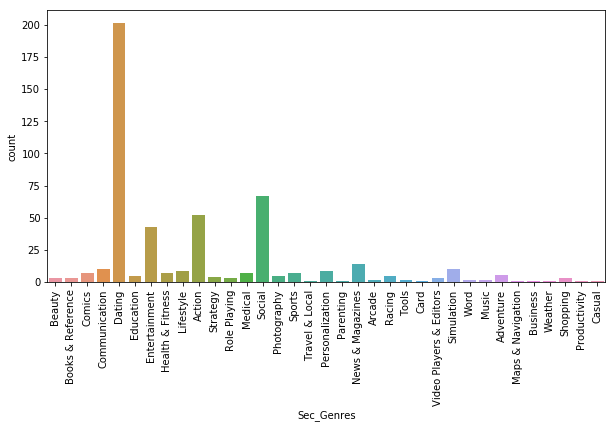

In [52]:
countplot_90(df_mature.Sec_Genres)

#### Apps mais baixados, de acordo com a classificação *Mature*

In [53]:
df_mature.groupby('App')[['Installs']].mean().sort_values(by=['Installs'], ascending=False).head(10)

,Installs
App,
Twitter,500000000.0
Badoo - Free Chat & Dating App,100000000.0
"Z Camera - Photo Editor, Beauty Selfie, Collage",100000000.0
Telegram,100000000.0
Tango - Live Video Broadcast,100000000.0
Tumblr,100000000.0
Sniper 3D Gun Shooter: Free Shooting Games - FPS,100000000.0
VK,100000000.0
Tinder,100000000.0


#### Para *Unrated*, só existem dois apps, e pode ter sido ocasionado por erro de classificação do Google Play ou erro de formatação no dataset

In [54]:
df_unrated = df[df['Content Rating'] == 'Unrated']

In [55]:
df_unrated.Sec_Genres

7312    Entertainment
8266            Tools
Name: Sec_Genres, dtype: object

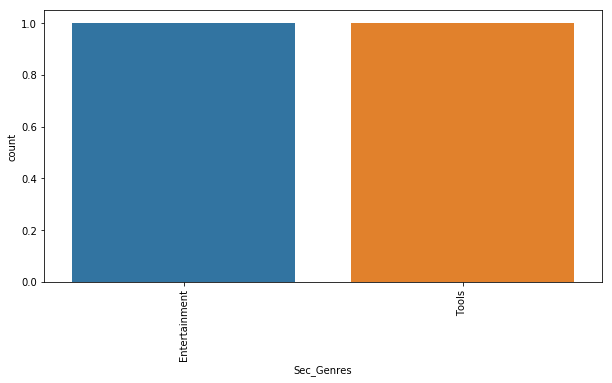

In [56]:
countplot_90(df_unrated.Sec_Genres)

#### Os apps não classificados foram *DC Universe Online Map* e *Best CG Photography*

In [57]:
df_unrated.groupby('App')[['Installs']].mean().sort_values(by=['Installs'], ascending=False).head(10)

,Installs
App,
DC Universe Online Map,50000.0
Best CG Photography,500.0


### Análise do Rating
#### Os aplitativos mais bem ranqueados tem a faixa de preço entre 3 e 10 dólares

In [58]:
df.groupby('Price')[['Rating']].mean().sort_values(by=['Rating'], ascending=False).head(10)

,Rating
Price,
3.04,5.0
1.75,5.0
2.50,4.8
19.40,4.7
2.59,4.7
3.90,4.7
15.99,4.7
10.00,4.6
18.99,4.6


#### Rating por preço

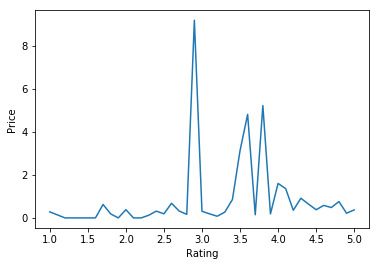

In [59]:
sns.lineplot(x='Rating', y='Price', ci=None, data=df)

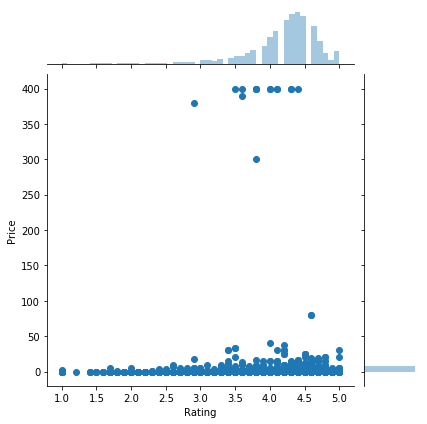

In [60]:
sns.jointplot(df.Rating, df.Price)

### Rating em relação ao número de apps no Google Play

Text(0.5, 1.0, 'Rating em relação ao numero de apps')

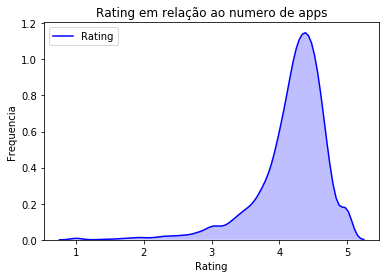

In [61]:
g = sns.kdeplot(df.Rating, color="blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequencia")
plt.title("Rating em relação ao numero de apps")

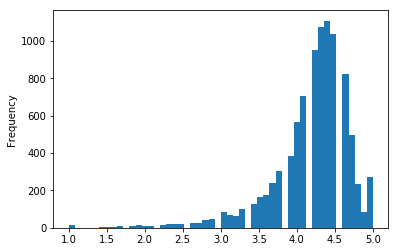

In [62]:
df.Rating.plot(kind = "hist", bins = 50)

#### Relação de Rating com a categoria dos apps

Text(0.5, 1.0, 'Rating x Category dos apps')

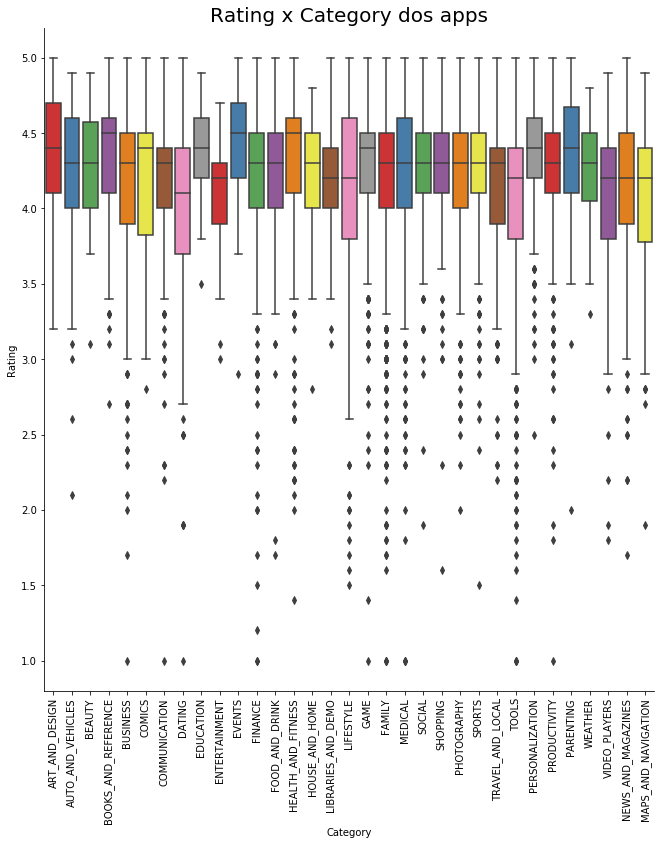

In [63]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
# g.despine(left=True)
g.set_xticklabels(rotation=90)
# g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Rating x Category dos apps',size = 20)

### Price
#### Se quiser mais instalações no seu app, precifique-o entre 0 a 1 dólar

Text(0.5, 1.0, 'Relação geral de preços')

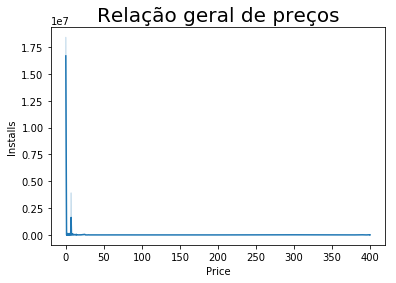

In [64]:
g = sns.lineplot(x="Price", y="Installs", data=df)
plt.title('Relação geral de preços',size = 20)

Text(0.5, 1.0, 'Preço x Installs entre $10')

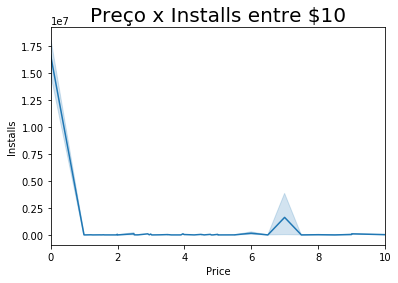

In [65]:
plt.figure()
g = sns.lineplot(x="Price", y="Installs", data=df)
g.set(xlim=(0, 10))
plt.title('Preço x Installs entre $10',size = 20)

#### A maioria dos apps são gratuitos

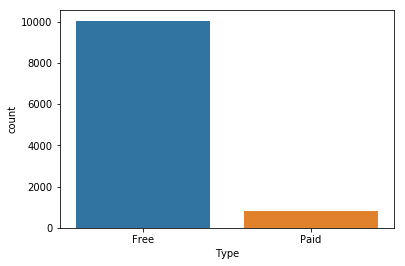

In [66]:
sns.countplot(df.Type);
plt.show()

### Review

Text(0, 0.5, 'Frequency')

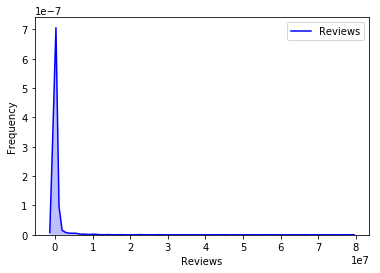

In [67]:
g = sns.kdeplot(df.Reviews, color="Blue", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")

## Size
### A maioria dos apps tem entre 0.0MB e 0.2MB

Text(0, 0.5, 'Número de apps')

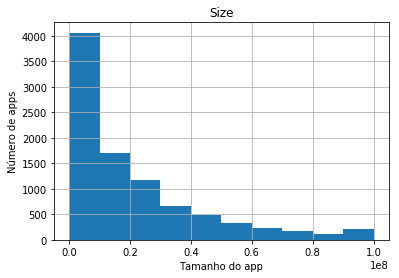

In [68]:
df.hist(column='Size')
plt.xlabel('Tamanho do app')
plt.ylabel('Número de apps')